- we have two types of scaling
  - score (standardization)
  - Min max scalar (Normalization)

**Z score**

In [ ]:
<img src = "z.png" >

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path=r"C:\Users\sneha\Documents\Data_files\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [ ]:
#step-1: take the prevailing wage data
#step-2: calculate mean of the data
#step=3: calculate sd of the data
#step-4: nr=data-mean step1-step2
#step-5: wage=nr/std = step4/step3
#step-6: create a column visa_df['z_wage']=z_wage

In [11]:
wage_data=visa_df['prevailing_wage']
wage_mean=wage_data.mean()
wage_std=wage_data.std()
nr=wage_data-wage_mean
z_wage=nr/wage_std
visa_df['z_wage']=z_wage

In [13]:
visa_df[['prevailing_wage','z_wage']]

,prevailing_wage,z_wage
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


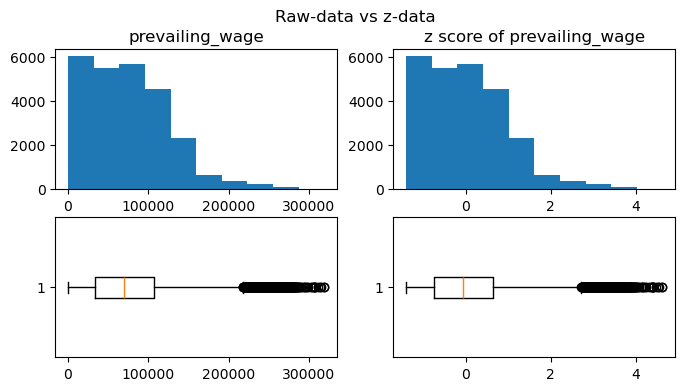

In [18]:
plt.figure(figsize=(8,4))
plt.suptitle('Raw-data vs z-data')
plt.subplot(2,2,1).hist(wage_data)
plt.title('prevailing_wage')
plt.subplot(2,2,2).hist(z_wage)
plt.title('z score of prevailing_wage')
plt.subplot(2,2,3).boxplot(wage_data,vert=False)
plt.subplot(2,2,4).boxplot(z_wage,vert=False)
plt.show()

## standardScalar

- sklearn
  - preprocessing
    - StandardScalar


In [ ]:
# step-1: import method
# step-2: save th method
# step-3: apply fit transform

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
wage_ss=ss.fit_transform(visa_df[['prevailing_wage']])
visa_df['wage_ss']=wage_ss

In [28]:
visa_df[['prevailing_wage','z_wage','wage_ss']]

,prevailing_wage,z_wage,wage_ss
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


In [ ]:
visa_df
visa_df['prevailing_wage']
visa_df['prevailing_wage'].values
visa_df[['prevailing_wage']]or visa_df['prevailing_wage'].values.reshape(-1,1)

In [29]:
visa_df['prevailing_wage'].values.reshape(-1,1)


array([[   592.2029],
       [ 83425.65  ],
       [122996.86  ],
       ...,
       [146298.85  ],
       [ 86154.77  ],
       [ 70876.91  ]])

In [32]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
wage_ss=ss.fit_transform(visa_df['prevailing_wage'].values.reshape(-1,1))
visa_df['wage_ss']=wage_ss
wage_ss

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

## MinMaxScalar

<img src = "m.png" >

In [ ]:
#step-1: read the data
#step-2:calculate min
#step-3: calculate max
#step-4: nr=step1-step2
#step-5: dr=step3-step2
#step-6: nr/dr
#step-7: visa_df['wage_min_max']=nr/dr

In [41]:
wage_data=visa_df['prevailing_wage']
min_data=wage_data.min()
max_data=wage_data.max()
nr=wage_data-min_data
dr=max_data-min_data
nr/dr
wage_min_max=visa_df['wage_min_max']=nr/dr
min(wage_min_max),max(wage_min_max)

(0.0, 1.0)

In [42]:
from sklearn.preprocessing import MinMaxScaler
mss=MinMaxScaler()
mss.fit_transform(visa_df['prevailing_wage'].values.reshape(-1,1))


array([[0.00184853],
       [0.2613452 ],
       [0.385312  ],
       ...,
       [0.45831136],
       [0.26989486],
       [0.22203311]])